<a href="https://colab.research.google.com/github/iwm10/T5/blob/main/penguins_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [72]:
import seaborn as sns

In [73]:
df = sns.load_dataset('penguins')

In [74]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [75]:
df.head(8)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

In [77]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [78]:
df.drop(3,inplace=True)

In [79]:
df['sex']=df['sex'].fillna('Unkown')

In [80]:
for col in ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']:
    df[col]=df[col].fillna(df[col].mean())

In [81]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [82]:
mem_usage_before = df.memory_usage(deep=True)

In [83]:
# convert categotical types
df['species'] = df['species'].astype('category')
df['island']=df['island'].astype('category')
df['sex']=df['sex'].astype('category')

In [84]:
# convert numerical types
df['bill_depth_mm'] = df['bill_depth_mm'].astype('float32')
df['bill_length_mm']=df['bill_length_mm'].astype('float32')
df['flipper_length_mm']=df['flipper_length_mm'].astype('float')
df['body_mass_g']=df['body_mass_g'].astype('float32')


Calculate memory saved after type conversion

In [85]:
mem_usage_after = df.memory_usage(deep=True)

In [86]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 65 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [87]:
df.groupby('sex')['bill_length_mm'].nunique()

<ipython-input-87-1540fe347945>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['bill_length_mm'].nunique()


sex
Female     97
Male      110
Unkown      8
Name: bill_length_mm, dtype: int64

In [88]:
df.nunique()

species                3
island                 3
bill_length_mm       165
bill_depth_mm         81
flipper_length_mm     56
body_mass_g           95
sex                    3
dtype: int64

# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [89]:
df_num=df.select_dtypes('number')
df_cat=df.select_dtypes('category')

In [90]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,343.0,43.921932,5.451596,32.099998,39.25,44.400002,48.500000,59.599998
bill_depth_mm,343.0,17.151169,1.971904,13.100000,15.60,17.299999,18.700001,21.500000
flipper_length_mm,343.0,200.915205,14.041141,172.000000,190.00,197.000000,213.000000,231.000000
body_mass_g,343.0,4201.754395,800.781250,2700.000000,3550.00,4050.000000,4750.000000,6300.000000


In [91]:
df_cat.describe()

,species,island,sex
count,343,343,343
unique,3,3,3
top,Adelie,Biscoe,Male
freq,151,168,168


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

<Axes: xlabel='species'>

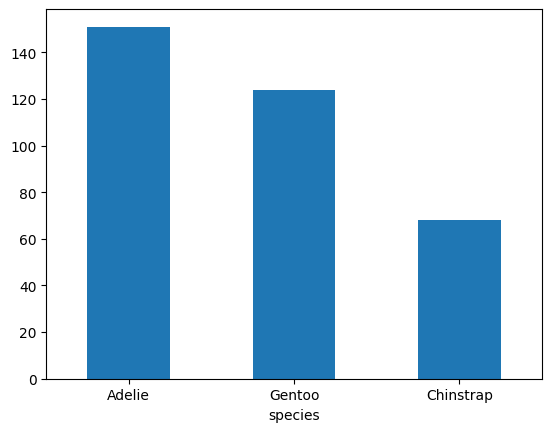

In [92]:
df['species'].value_counts().plot.bar(rot=0)

<Axes: ylabel='count'>

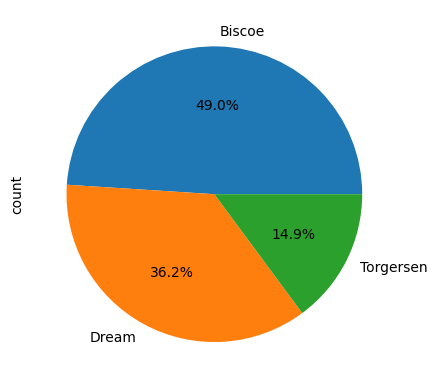

In [93]:
df['island'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='sex'>

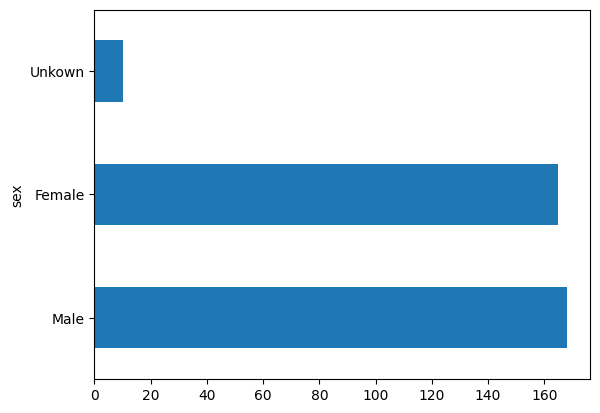

In [94]:
df['sex'].value_counts().plot.barh(rot=0)

Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

<Axes: >

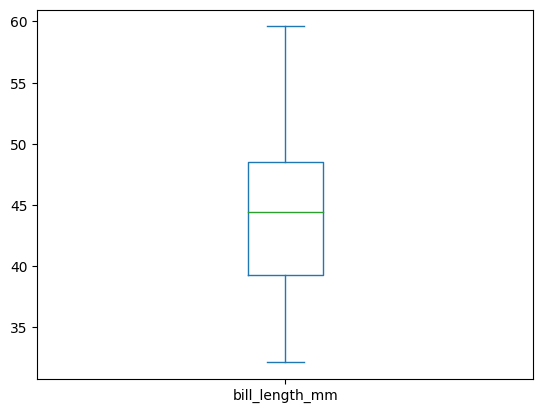

In [95]:
df['bill_length_mm'].plot.box()

<Axes: ylabel='Frequency'>

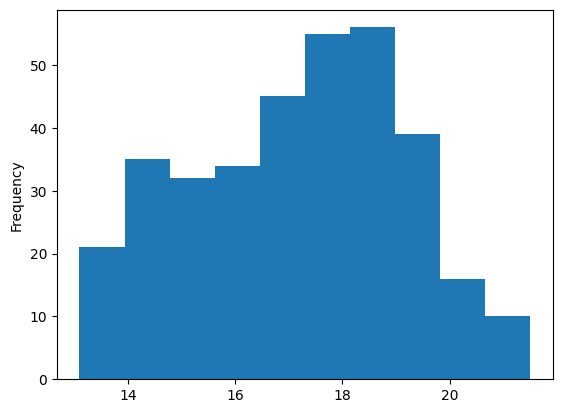

In [96]:
df['bill_depth_mm'].plot.hist()

<Axes: >

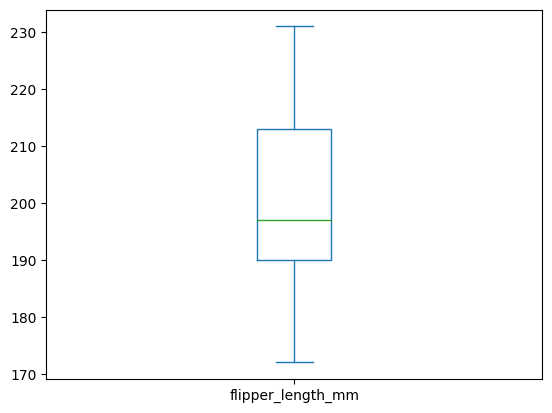

In [97]:
df['flipper_length_mm'].plot.box()

<Axes: ylabel='Frequency'>

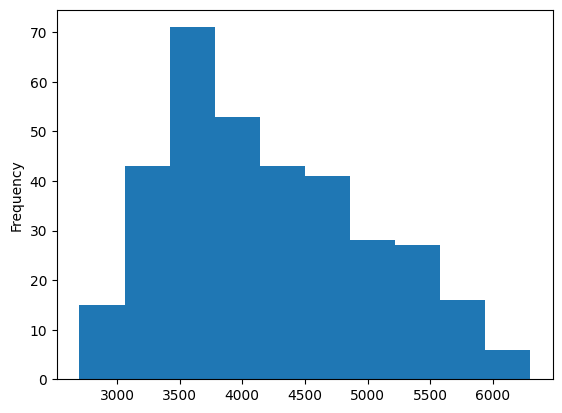

In [98]:
df['body_mass_g'].plot.hist()

## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

In [99]:
df.select_dtypes('number').corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: >

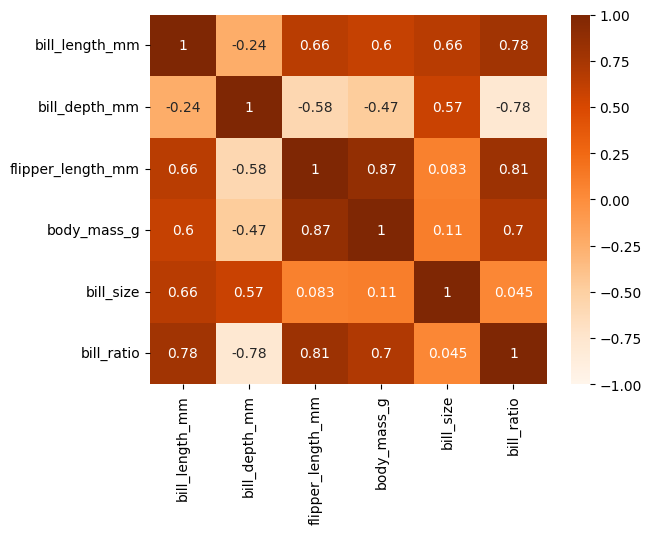

In [105]:
sns.heatmap(df.select_dtypes('number').corr(),vmin=-1,vmax=1,annot=True,cmap="Oranges")

Write down your observations based on the correlation heatmap.

Observations:

### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [101]:
df['bill_size']=df['bill_length_mm']*df['bill_depth_mm']
df['bill_size'].sample(5)

280    625.140015
84     663.939941
53     819.000000
95     771.119995
273    751.500000
Name: bill_size, dtype: float32

In [102]:
df['bill_ratio']=df['bill_length_mm'] / df['bill_depth_mm']
df['bill_ratio'].sample(4)

13     1.820755
103    1.890000
39     2.083770
65     2.311111
Name: bill_ratio, dtype: float32

Let's look at the correlation to see whether the newly created features are better.

In [103]:
corr=df.select_dtypes('number').corr()
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_size,bill_ratio
bill_length_mm,1.000000,-0.235053,0.656181,0.595110,0.657275,0.780387
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,0.574722,-0.784181
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.083154,0.805156
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.108206,0.703111
bill_size,0.657275,0.574722,0.083154,0.108206,1.000000,0.044933
bill_ratio,0.780387,-0.784181,0.805156,0.703111,0.044933,1.000000


<Axes: >

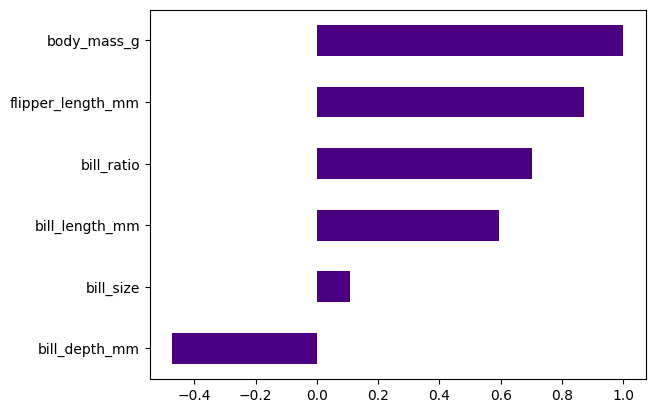

In [104]:
# This plots the correlation values for a specific column
# which is usually what we are interested in
#corr['body_mass_g'].sort_values().plt.barh()
corr['body_mass_g'].sort_values().plot(kind='barh', color='indigo')